**Collaboration and Workflow**

At the start of our group project, we met regularly to develop and understand the project together. Our main goal was for every group member to be able to follow and comprehend the code and its functionality equally. For this reason, we wrote and discussed most parts of the code together during these meetings. Consequently, rather than following a strict or conventional GitHub workflow with clearly defined individual contributions, we focused on collaborative development and shared understanding.

**Use of artificial intelligence**

Artificial intelligence was used as a supportive tool during the project. In particular, it proved very helpful for identifying and installing the required older versions of software packages, as well as for correctly addressing and managing these packages via the terminal. ChatGPT was also used to debugging error messages that occurred during code development, alongside Python’s built-in help functions and official documentation. The support provided mainly focused on debugging, understanding error outputs, and suggesting possible solutions. In addition to AI, extensive online research was conducted using search engines to identify solutions, consult forums and review relevant documentation. All functions or code segments identified with ChatGPT's help are explicitly marked in the source code with the comment '#ChatGPT' to ensure transparency and traceability.

**TASK 1**

Climate change is expected to increase both the frequency and intensity of extreme climate events such as heatwaves. Traditionally, climate impacts are evaluated using annual statistics, for example the fraction of land affected by heatwaves in a given year which describes how much of a country’s land area is affected by extreme heat in a given year, and Lifetime exposure to heatwaves, which estimates the cumulative number of heatwave events experienced by individuals born in a specific year over their lifetime. This notebook analyze these events for multiple warming scenarios, including 1.5 °C, 2 °C, and the Nationally Determined Contributions (NDC) scenario.

The climate exposure data are provided as xarray datasets, which store multi-dimensional information indexed by country, time (or birth year), and scenario. These datasets contain a multi-model mean (mmm) representing the average across climate models, and a standard deviation (std) representing uncertainty. For visualization, xarray objects are converted to NumPy arrays and other Dataframes, which are then merged with a Geodataframe of country borders. This allows spatial visualization of lifetime heatwave exposure on global maps.

Throughout the notebook, some references were used to obtain further details about how to apply certain functions on our data to get the best figures possible, and also a paper was used to validate our results that showed for example that younger generations are expected to face more such events across their lifetimes compared with older generations.

[1] Thiery, W., Lange, S., Rogelj, J., Schleussner, C.-F., Gudmundsson, L., Seneviratne, S. I., Wada, Y., Frieler, K., Emanuel, K., Geiger, T., Bresch, D. N., Zhao, F., Willner, S. N., Büchner, M., Volkholz, J., Bauer, N., Chang, J., Ciais, P., Dury, M., … Piontek, F. (2021). Intergenerational inequities in exposure to climate extremes. Science, 374(6564), 158–160. https://doi.org/10.1126/science.abi7339

[2] https://docs.xarray.dev

[3] https://docs.xarray.dev/en/stable/user-guide/indexing.html

[4] https://docs.xarray.dev/en/stable/generated/xarray.Dataset.sel.html

[5] https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

[6] https://matplotlib.org/stable/contents.html

[7] https://matplotlib.org/stable/tutorials/text/annotations.html

[8] https://docs.python.org/3/library/pickle.html

[9] https://docs.xarray.dev/en/stable/generated/xarray.DataArray.values.html

[10] https://docs.python.org/3/reference/lexical_analysis.html#f-strings

[11] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

[12] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

[13] https://matplotlib.org/stable/users/explain/colors/colormaps.html

[14] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

[15] https://docs.python.org/3/library/functions.html#zip 

[16] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

[17] https://geopandas.org/en/stable/docs/user_guide/mapping.html

[18] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

[19] https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html

[20] OpenAI. (2025). ChatGPT. https://chat.openai.com/

[21] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

[22] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Checking the versions is an important step to make sure we will not have errors later on while working**

In [1]:
import pandas, numpy, scipy, matplotlib, xarray, geopandas
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("matplotlib:", matplotlib.__version__)
print("xarray:", xarray.__version__)
print("geopandas:", geopandas.__version__)

pandas: 1.4.2
numpy: 1.22.4
scipy: 1.8.1
matplotlib: 3.5.3
xarray: 2022.6.0
geopandas: 0.12.2


In [14]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import geopandas as gpd

from pathlib import Path
DATA_PATH = Path.cwd() / "Data" # [20] A general path to use for all devices, and to not encounter problems

**TASK 2**

In [15]:
path_lfe = DATA_PATH / "ds_lfe_percountry.pkl" 
with open(path_lfe, "rb") as f: # [8] rb because pickles reads bytes not texts
    ds_lfe = pickle.load(f) # Loaded using pickle as asked

ds_lfe

<xarray.Dataset>
Dimensions:                                 (run: 12, country: 177,
                                             time_ind: 154)
Coordinates:
  * run                                     (run) int64 1 2 3 4 5 ... 9 10 11 12
  * country                                 (country) object 'Afghanistan' .....
  * time_ind                                (time_ind) int64 0 1 2 ... 152 153
    quantile                                float64 0.25
Data variables: (12/46)
    landfrac_peryear_percountry_RCP         (run, country, time_ind) float64 ...
    landfrac_peryear_percountry_15          (run, country, time_ind) float64 ...
    landfrac_peryear_percountry_20          (run, country, time_ind) float64 ...
    landfrac_peryear_percountry_NDC         (run, country, time_ind) float64 ...
    landfrac_peryear_percountry_STS_ModAct  (run, country, time_ind) float64 ...
    landfrac_peryear_percountry_STS_Ren     (run, country, time_ind) float64 ...
    ...                                      ...
    std_STS_Ren                             (country, time_ind) float64 0.0 ....
    std_STS_Ren_sm                          (country, time_ind) float64 0.087...
    lqntl_STS_Ren                           (country, time_ind) float64 0.0 ....
    uqntl_STS_Ren                           (country, time_ind) float64 0.0 ....
    median_STS_Ren                          (country, time_ind) float64 0.0 ....
    median_STS_Ren_sm                       (country, time_ind) float64 0.031...

**TASK 3**

In [16]:
years = 1960 + ds_lfe["time_ind"].values 
# [2] ds_lfe["time_ind"] selects the coordinate time_ind from xarray.
# [9] Convert it from an xarray object into a NumPy array because plotting operate on numerical arrays not on labeled data structures

print (years[:5], years[-5:] )
# Showing this just to make sure we have the actual years 1960 to 2113 (needed)

[1960 1961 1962 1963 1964] [2109 2110 2111 2112 2113]


In [17]:
def plot_annual_land_fraction(ds, country): # Function with dataset ds, and country to be called
    ds_c = ds.sel(country=country) # [3] Sel for selecting by label, not by index (e.g Belgium not 2)
    # For example when called data ds.lfe for country Belgium (But stored in ds_c as ds.lfe_Belgium)
    
    plt.figure(figsize=(8,5))

   # Define scenarios to use variables from: (mean variable, std variable, label)
    scenarios = [("mmm_15_sm", "std_15_sm", "1.5°C"), ("mmm_20_sm", "std_20_sm", "2°C"), ("mmm_NDC_sm", "std_NDC_sm", "NDC"),]
    for mean_var, std_var, label in scenarios:
        m = ds_c[mean_var].values # [9]
        s = ds_c[std_var].values # [9]
        plt.plot(years, m, label=label)
        plt.fill_between(years, m-s, m+s, alpha=0.3) # [11] Helped us fill the Fill the area between two curves, for the uncertainty bounds (m-s, m+s)

    plt.xlabel("Year")
    plt.ylabel("Land fraction exposed (%)")
    plt.title(f"Annual land fraction exposed to heatwaves – {country}") # [10] Helped us to call the right name without errors
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
# The function does not return anything because its purpose is to produce a plot, not to compute data.

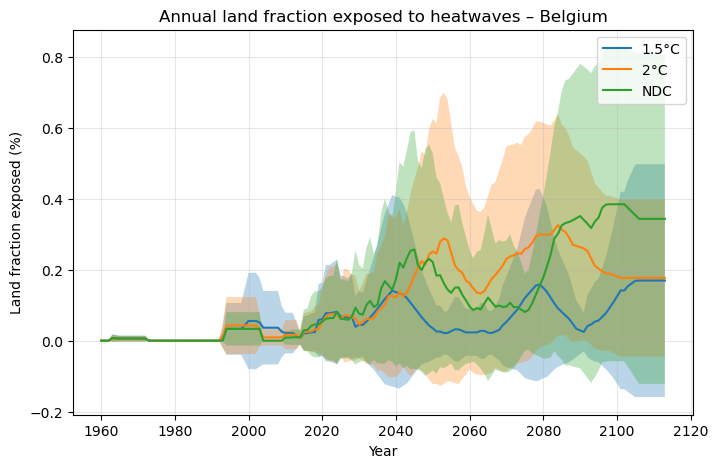

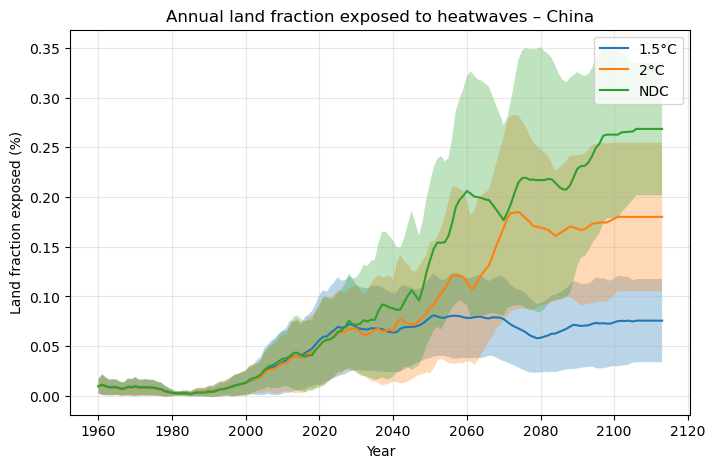

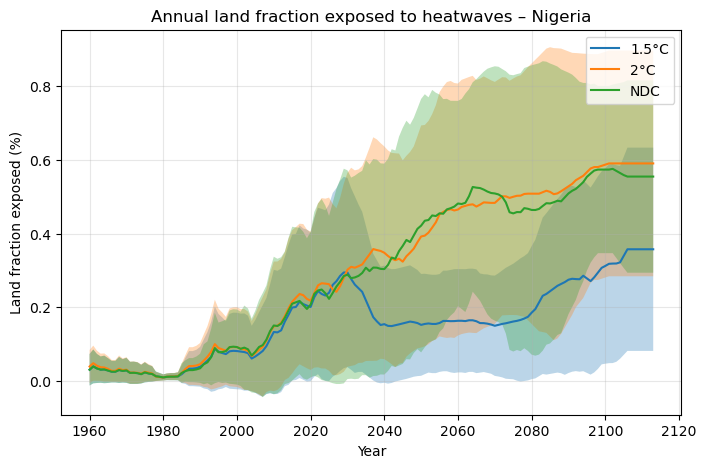

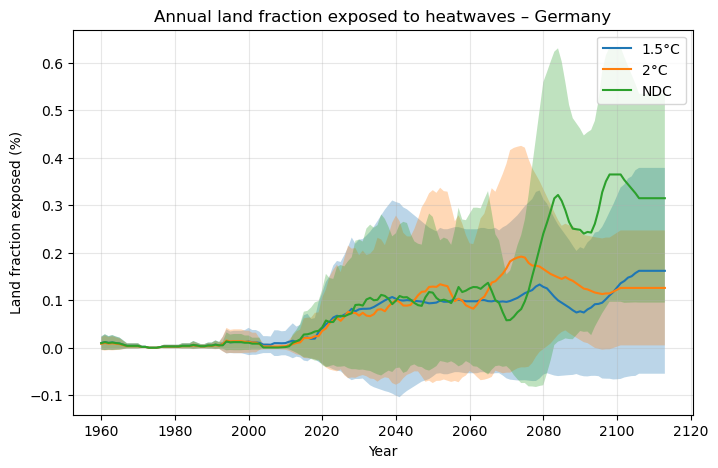

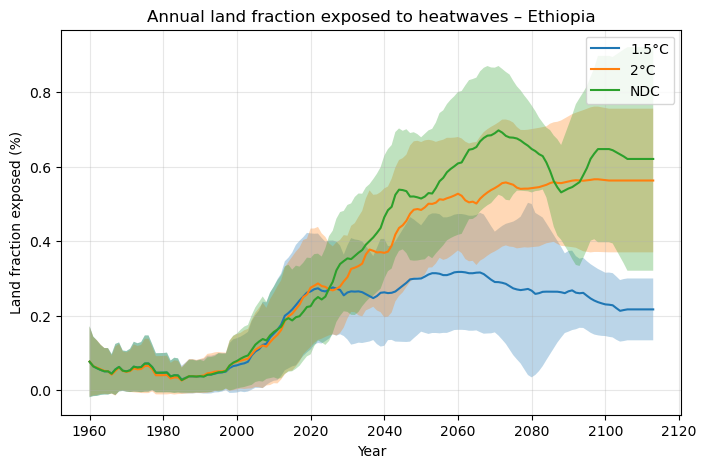

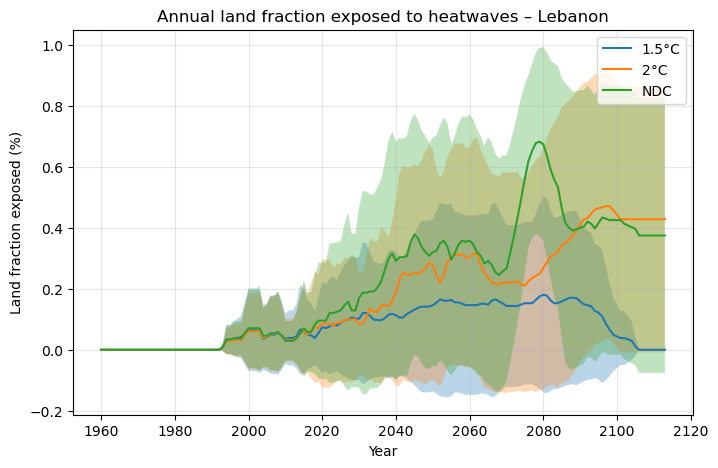

In [18]:
for c in ["Belgium", "China", "Nigeria", "Germany", "Ethiopia", "Lebanon"]: # Plotted some additional countries, but compared the needed ones
    plot_annual_land_fraction(ds_lfe, c)


**TASK 4**

The annual land fraction exposed to heatwaves increases over time for all countries. Stronger warming scenarios lead to higher exposure, with the NDC scenario producing the largest impacts. The shaded areas indicate uncertainty across climate models, which increases toward the end of the century.

**TASK 5**

In [19]:
path_le = DATA_PATH / "ds_le_percountry.pkl"
with open(path_le, "rb") as f: # [8] rb because pickles reads bytes not texts
    ds_le = pickle.load(f) # Loaded using pickle as asked
    
ds_le

<xarray.Dataset>
Dimensions:                          (run: 12, country: 177, birth_year: 61,
                                      GMT: 21)
Coordinates:
  * run                              (run) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * country                          (country) object 'Afghanistan' ... 'Zimb...
  * birth_year                       (birth_year) int64 1960 1961 ... 2019 2020
  * GMT                              (GMT) int64 0 1 2 3 4 5 ... 16 17 18 19 20
    quantile                         float64 0.25
Data variables: (12/80)
    le_percountry_perrun_15          (run, country, birth_year) float64 5.968...
    le_percountry_perrun_20          (run, country, birth_year) float64 nan ....
    le_percountry_perrun_NDC         (run, country, birth_year) float64 nan ....
    le_percountry_perrun_OS          (run, country, birth_year) float64 nan ....
    le_percountry_perrun_noOS        (run, country, birth_year) float64 5.032...
    le_percountry_perrun_STS_ModAct  (run, country, birth_year) float64 nan ....
    ...                               ...
    uqntl_BE                         (country, birth_year, GMT) float64 2.766...
    median_BE                        (country, birth_year, GMT) float64 1.905...
    mmm_EMF_BE                       (country, birth_year, GMT) float64 1.0 ....
    lqntl_EMF_BE                     (country, birth_year, GMT) float64 0.162...
    uqntl_EMF_BE                     (country, birth_year, GMT) float64 1.094...
    median_EMF_BE                    (country, birth_year, GMT) float64 0.753...

**TASK 6**

In [20]:
birth_years = ds_le["birth_year"].values 
# [2] ds_le["birth_year"] selects the coordinate birth year from xarray.
# [9] Convert it from an xarray object into a NumPy array because plotting operate on numerical arrays not on labeled data structures

print (birth_years[:5], birth_years[-5:] )
# Showing this just to make sure we have the actual years 1960 to 2020

[1960 1961 1962 1963 1964] [2016 2017 2018 2019 2020]


In [21]:
def plot_lifetime_exposure(ds, country):# Function with dataset ds, and country to be called
    ds_c = ds.sel(country=country) # [3] Sel for selecting by label, not by index (e.g Belgium not 2)
    # For example when called data ds.lfe for country Belgium (But stored in ds_c as ds.lfe_Belgium)
        
    plt.figure(figsize=(8,5))

   # Define scenarios to use variables from: (mean variable, std variable, label)
    scenarios = [("mmm_15", "std_15", "1.5°C"), ("mmm_20", "std_20", "2°C"), ("mmm_NDC", "std_NDC", "NDC"),]
    for mean_var, std_var, label in scenarios:
        m = ds_c[mean_var].values # [9]
        s = ds_c[std_var].values # [9]
        plt.plot(birth_years, m, label=label)
        plt.fill_between(birth_years, m-s, m+s, alpha=0.3) # [11] Helped us fill the Fill the area between two curves, for the uncertainty bounds (m-s, m+s)

    plt.xlabel("Birth Year")
    plt.ylabel("Lifetime exposure to heatwaves")
    plt.title(f"Lifetime exposure to heatwaves – {country}") # [10] Helped us to call the right name without errors
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


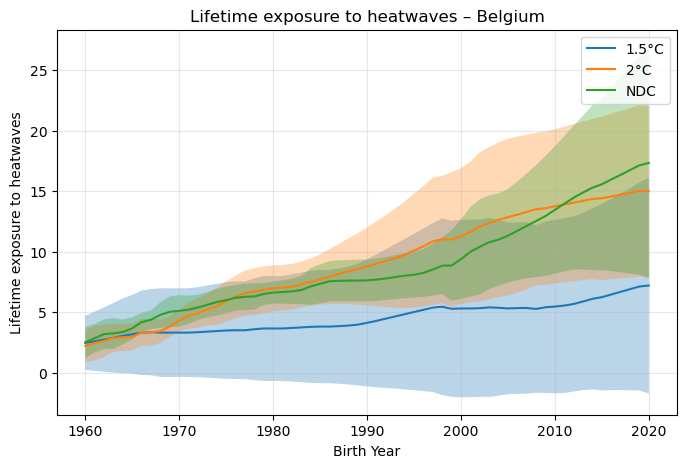

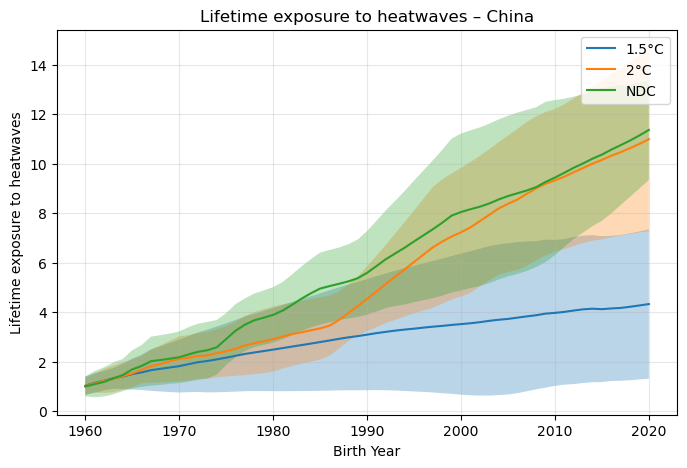

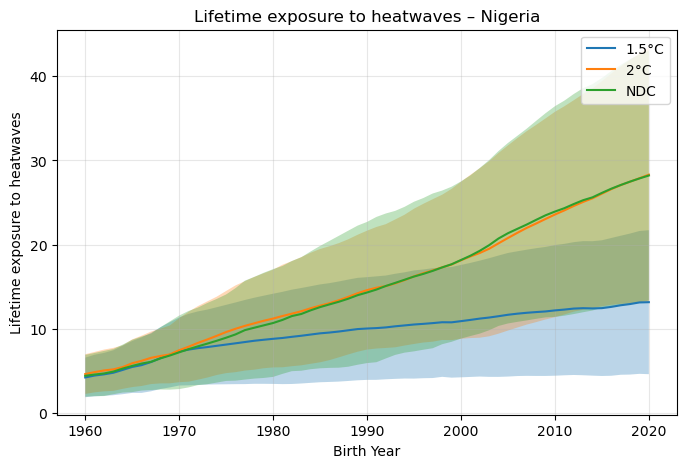

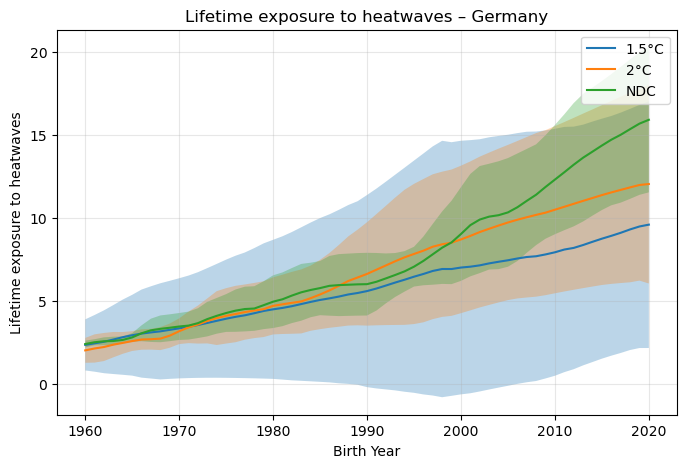

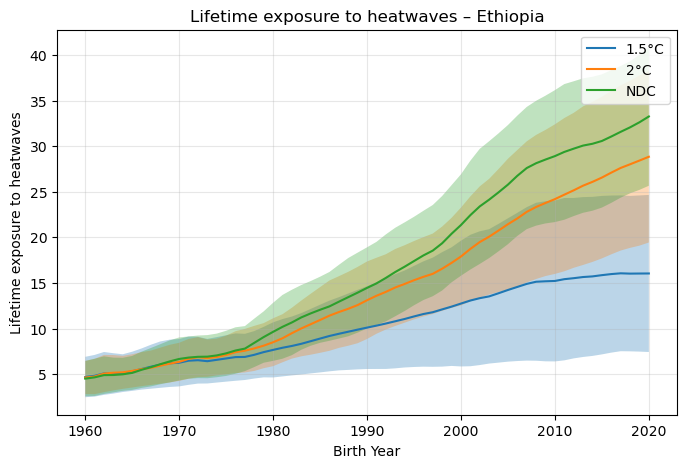

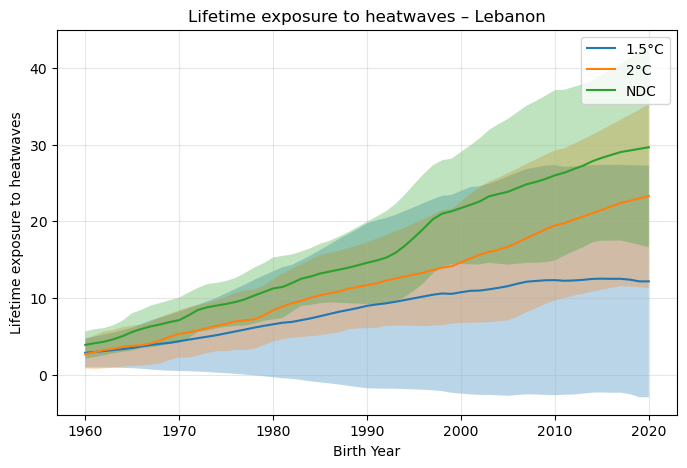

In [22]:
for c in ["Belgium", "China", "Nigeria", "Germany", "Ethiopia", "Lebanon"]: # Plotted some additional countries, but compared the needed ones
    plot_lifetime_exposure(ds_le, c)


Annual land fraction exposure describes how heatwave impacts evolve year by year, while lifetime exposure shows the cumulative number of heatwaves an individual experiences over their life. Younger generations experience much higher lifetime exposure, especially under the NDC scenario, highlighting intergenerational inequality.

**TASK 7**

Belgium

Annual: Heat waves will become significantly more frequent by the middle of the 21st century. The differences between the scenarios will become apparent around 2040. Even with climate protection scenario 1.5, there will be a clear upward trend.
Lifetime: Older generations experienced only a few heat waves in their lifetime. Birth cohorts after 2000 will be affected much more frequently. Limiting climate protection to 1.5°C significantly reduces the burden. Without additional measures, lifetime exposure will triple.

Nigeria

Annual: Starting around 2030, intense heat will dominate large areas of land. By the end of the century, the NDC pathway will lead to nearly constant exposure. This is the strongest increase of all countries shown.
Lifetime: There is already high baseline exposure today, which will continue to increase. People born after 2000 will experience approximately 20 heat waves in their lifetime. The difference between the scenarios is particularly large. The 1.5°C scenario remains significantly more moderate. Without climate protection, there is a risk of significant health impacts.

China:

Annual: Increasing warming leads to a steadily growing heat area. Around 2050, there will be a significant increase. The 2°C and NDC scenarios show similar long-term trends, but with greater intensity.
Lifetime There has been a significant increase in lifetime exposure since birth cohorts in the 1960s. Younger generations experience many times more heat waves. The difference between 1.5°C and 2°C was already noticeable by 1990. From this point on, a rising or diverging trend becomes apparent. Climate protection can slow down the increase but cannot stop it completely.
Worldwide, heat waves are increasing in terms of area, frequency, and duration. The strongest increases are occurring in tropical regions (Nigeria). Taking a lifetime perspective reveals generational inequality. Today's children experience extreme heat many times more often than e.g. their grandparents did. While limiting warming to 1.5°C has a strong mitigating effect, it does not provide complete relief.

**TASK 8**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19352\66216877.py:9: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  gdf = pickle.load(f)


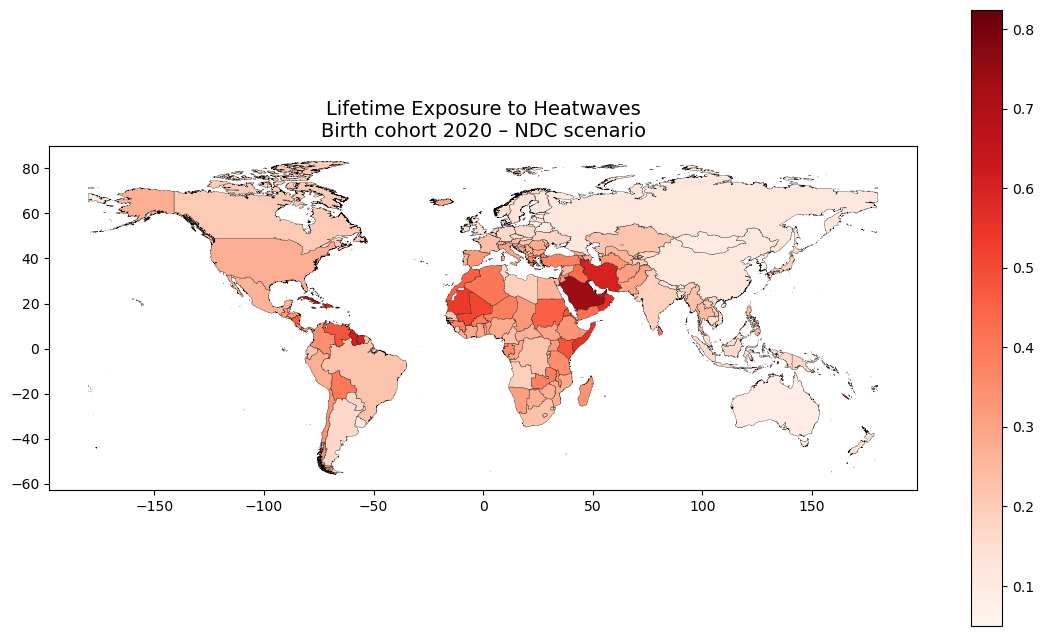

In [23]:
DATA_PATH = Path.cwd() / "Data" # [20]
PATH_LE  = DATA_PATH / "ds_le_percountry.pkl"
PATH_GDF = DATA_PATH / "gdf_country_borders.pkl"

with open(PATH_LE, "rb") as f:  # [8] Load lifetime exposure dataset
    ds_le = pickle.load(f) # Load as an xarray dataset
    
with open(PATH_GDF, "rb") as f: # [8] Load country borders geodataframe
    gdf = pickle.load(f) 
    
gdf = gpd.GeoDataFrame(gdf, geometry="geometry") # [11] Ensures the geometry column is called geometry
gdf = gdf.reset_index()  # [12] Move country names from index to column to be able to use in a table

if "name" in gdf.columns:
    gdf = gdf.rename(columns={"name": "country"})
elif "index" in gdf.columns:
    gdf = gdf.rename(columns={"index": "country"})

ds_2020 = ds_le.sel(birth_year=2020) # [3] Select birth cohort 2020 in the NDC scenario
le_mmm = ds_2020["mmm_NDC"]
le_std = ds_2020["std_NDC"]

df_le = le_mmm.to_dataframe(name="mmm").reset_index() # [12] Dataframes are better for merging, tables and other simple representations
df_le["std"] = le_std.to_dataframe(name="std").reset_index()["std"]
gdf_plot = gdf.merge(df_le, on="country", how="left") # [18] Merging combines two datasets based on a shared key (e.g country name), allowing attributes from different sources to be joined into a single table

gdf_plot["mmm_frac"] = gdf_plot["mmm"] / 100.0  # Convert to fractions 
gdf_plot["std_frac"] = gdf_plot["std"] / 100.0

fig,ax = plt.subplots(figsize=(14, 8))
gdf_plot.plot(column="mmm_frac", cmap="Reds", linewidth=0.2, edgecolor="black", legend=True, ax=ax) # [13] Color map representation
ax.set_title("Lifetime Exposure to Heatwaves\nBirth cohort 2020 – NDC scenario", fontsize=14)
plt.show()

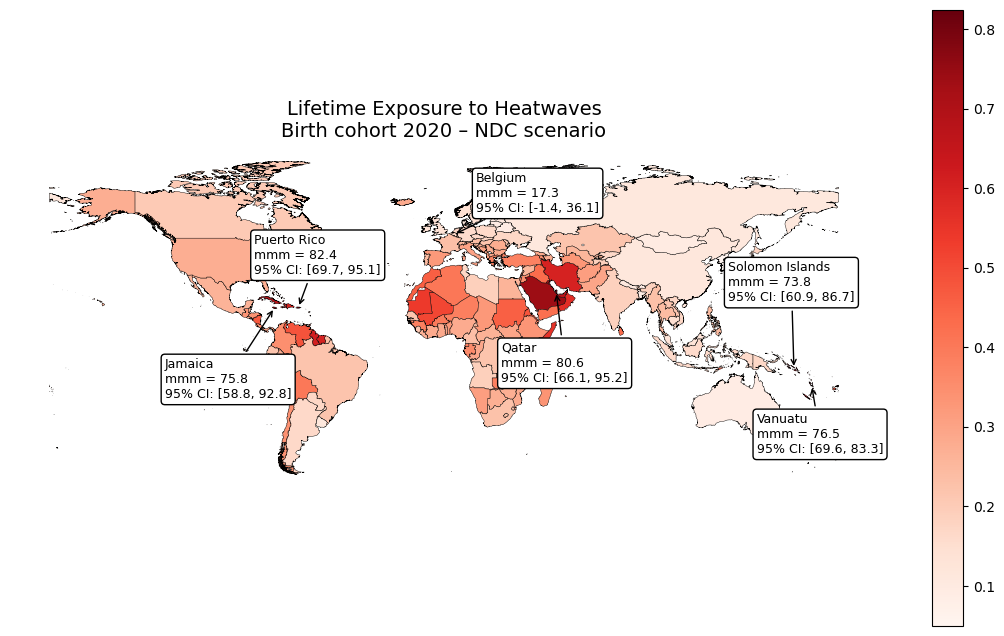

In [24]:
#Then select to 5 countries according to mmm values and plot them on the map
top5 = (df_le.sort_values("mmm", ascending=False).head(5)["country"].tolist()) # [14] Sort the values to determine top 5 and convert series to list

countries_to_annotate = top5 + ["Belgium"]
annot_df = gdf_plot[gdf_plot["country"].isin(countries_to_annotate)] # [19] Subset GeoDataFrame for annotations filters rows by checking whether values belong to a given list, which is useful for selecting a subset of countries.


fig, ax = plt.subplots(figsize=(14, 8))

gdf_plot.plot(column="mmm_frac", cmap="Reds", linewidth=0.3, edgecolor="black", legend=True, ax=ax)
ax.set_title("Lifetime Exposure to Heatwaves\nBirth cohort 2020 – NDC scenario", fontsize=14)
ax.axis("off")

# Put any offset to change box location on the map (Belgium and the 5 other)
offsets = {"Belgium": (10, 10), top5[0]: (-20, 15), top5[1]: (-25, -40), top5[2]: (-25, -30), top5[3]: (-50, -40), top5[4]: (-30, 30),}

for _, row in annot_df.iterrows(): # [20] An AI-based assistant was consulted to better understand annotation, logic and layout were adjusted manually.
    if row.geometry is None:
        continue
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    dx, dy = offsets.get(row["country"], (15, 15))

    ci_low  = row["mmm"] - 1.96 * row["std"] # 95% of values lie within +-1.96 standard deviations
    ci_high = row["mmm"] + 1.96 * row["std"]

    label = (f"{row['country']}\n" f"mmm = {row['mmm']:.1f}\n" f"95% CI: [{ci_low:.1f}, {ci_high:.1f}]")
    ax.annotate(label, xy=(x, y), xytext=(x + dx, y + dy), arrowprops=dict(arrowstyle="->", lw=1), bbox=dict(boxstyle="round", fc="white", ec="black"), fontsize=9)

plt.show()

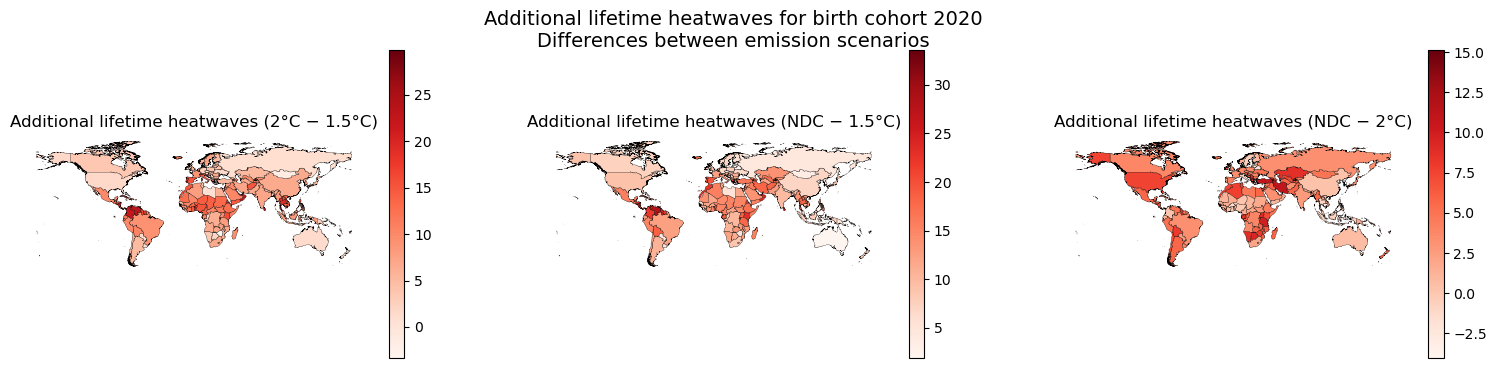

In [25]:
ds_2020 = ds_le.sel(birth_year=2020) # [3] Selection of birth cohort 2020
df_diff = ds_2020[["mmm_15", "mmm_20", "mmm_NDC"]].to_dataframe().reset_index() # [12] Dataframes are better for merging, tables and other simple representations

# Compute differences between heatwaves
df_diff["add_20_vs_15"]  = df_diff["mmm_20"]  - df_diff["mmm_15"]
df_diff["add_NDC_vs_15"] = df_diff["mmm_NDC"] - df_diff["mmm_15"]
df_diff["add_NDC_vs_20"] = df_diff["mmm_NDC"] - df_diff["mmm_20"]

gdf_diff = gdf.merge(df_diff, on="country", how="left")  # [18] Merge computed difference with country geometries  

maps = {"add_20_vs_15": "Additional lifetime heatwaves (2°C − 1.5°C)", "add_NDC_vs_15": "Additional lifetime heatwaves (NDC − 1.5°C)", "add_NDC_vs_20": "Additional lifetime heatwaves (NDC − 2°C)",}

fig, axes = plt.subplots(1, 3, figsize=(19, 4)) 

for ax, (col, title) in zip(axes, maps.items()):
    gdf_diff.plot(column=col, cmap="Reds", legend=True, ax=ax, edgecolor="black", linewidth=0.2)
    ax.set_title(title, fontsize=12)
    ax.axis("off")
    
plt.suptitle("Additional lifetime heatwaves for birth cohort 2020\nDifferences between emission scenarios", fontsize=14)
plt.show()

Countries in the Global South experience substantially larger increases in lifetime heatwaves when moving from 1.5°C to NDC.

Differences between 2°C and 1.5°C are already large, while NDC adds even more exposure, highlighting the cost of delayed mitigation.

Spatial patterns reflect both climate sensitivity and population exposure.

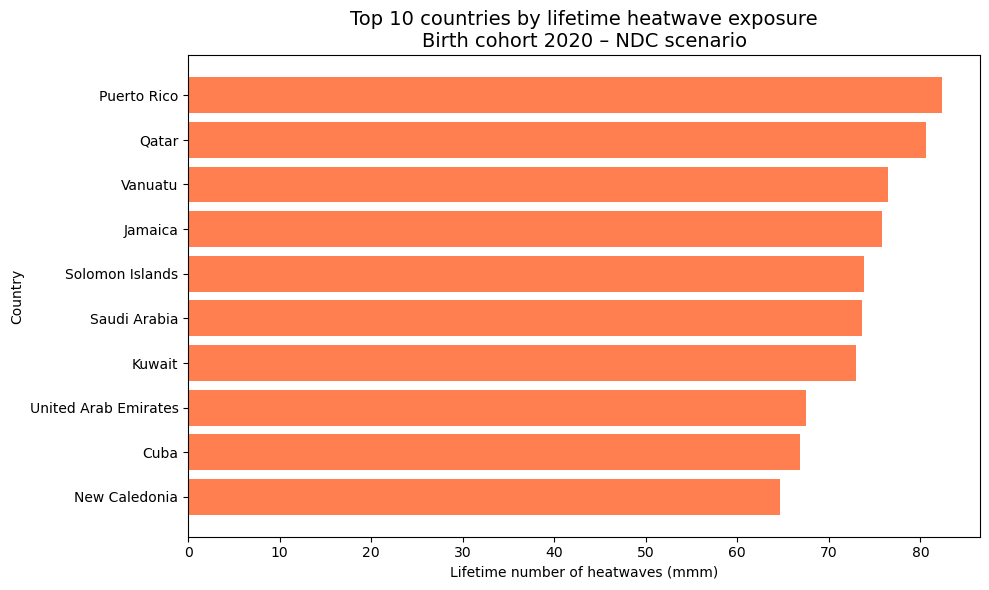

In [26]:
ds_2020 = ds_le.sel(birth_year=2020)    # [3] Selection of birth cohort 2020
df_2020 = (ds_2020["mmm_NDC"].to_dataframe(name="mmm").reset_index()) # [12] Dataframes are better for merging, tables and other simple representations

#Then select to 10 countries according to mmm values and plot them on the map
top10 = (df_2020.sort_values("mmm", ascending=False).head(10)) # [14] Sort the values to determine top 5, no need for list here like before

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.barh(top10["country"],top10["mmm"],color="coral")

ax.set_xlabel("Lifetime number of heatwaves (mmm)")
ax.set_ylabel("Country")
ax.set_title("Top 10 countries by lifetime heatwave exposure\nBirth cohort 2020 – NDC scenario", fontsize=14)
ax.invert_yaxis()    # Show highest value on top
plt.tight_layout()
plt.show()


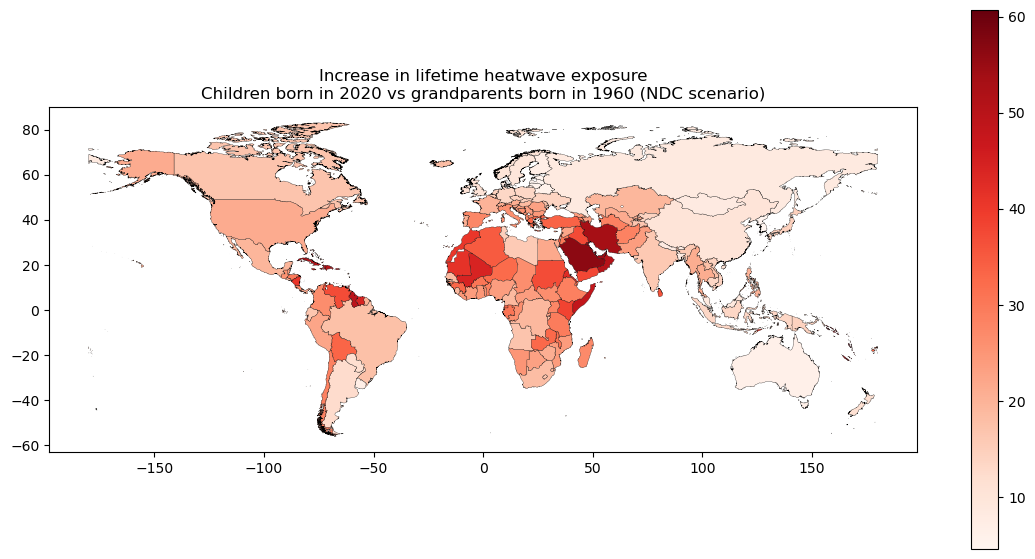

In [27]:
ds_2020 = ds_le.sel(birth_year=2020) # [3] To select thee data for the year we wan
ds_1960 = ds_le.sel(birth_year=1960) 

dfs = {}
for year, ds in zip([2020, 1960], [ds_2020, ds_1960]):
    df = ds["mmm_NDC"].to_dataframe().reset_index()
    df = df.rename(columns={"mmm_NDC": f"mmm_{year}"})
    dfs[year] = df

df_2020 = dfs[2020]
df_1960 = dfs[1960]

df_gen = df_2020.merge(df_1960, on="country") # [18] Merge the two dataframes using country
df_gen["diff_2020_1960"] = df_gen["mmm_2020"] - df_gen["mmm_1960"] # Calculate the difference between generations
gdf_gen = gdf.merge(df_gen, on="country", how="left") # [18] Merge with the world map data

fig, ax = plt.subplots(figsize=(14, 7))
gdf_gen.plot(column="diff_2020_1960", cmap="Reds", legend=True, ax=ax, edgecolor="black", linewidth=0.2) # [17] Geodataframe plot
ax.set_title("Increase in lifetime heatwave exposure\n" "Children born in 2020 vs grandparents born in 1960 (NDC scenario)")
plt.show()

**Optional Task 1**

**Descriptive statistics for lifetime exposure in 2020 (NDC)**

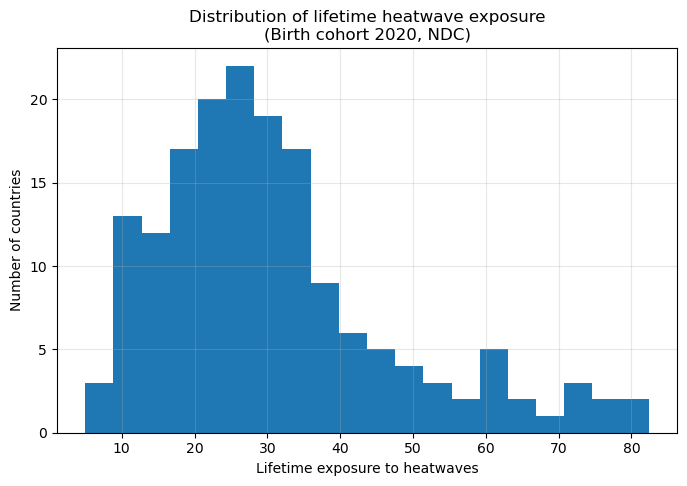

In [28]:
ds_2020 = ds_le.sel(birth_year=2020) # [3] Selected year 2020

le_NDC = ds_2020["mmm_NDC"].to_dataframe(name="mmm").reset_index() # [12]
le_NDC[["mmm"]].describe()

# Histogram of lifetime exposure (2020, NDC)
plt.figure(figsize=(8, 5))
plt.hist(le_NDC["mmm"], bins=20)

plt.xlabel("Lifetime exposure to heatwaves")
plt.ylabel("Number of countries")
plt.title("Distribution of lifetime heatwave exposure\n(Birth cohort 2020, NDC)")
plt.grid(alpha=0.3)
plt.show()

The histogram shows how lifetime exposure to heatwaves is distributed among the 2020 birth cohort under the NDC warming scenario, across all countries. It is clearly right-skewed, indicating that, while most countries experience moderate levels of lifetime exposure to heatwaves, a smaller number face substantially higher levels.
The majority of countries are clustered within the range of approximately 15 to 35 heatwave events, suggesting that, globally, lifetime exposure remains relatively limited compared to extremes experienced in certain regions. However, the long tail of the distribution extends beyond 60 events, with a few countries experiencing over 80 heatwaves in their lifetime, highlighting pronounced regional disparities.
This skewed distribution emphasises the inequality in climate impacts, whereby a small number of countries, likely situated in regions that are already warm or vulnerable, are disproportionately affected. These differences emphasise the importance of regional adaptation strategies, as global averages mask the extreme risks faced by specific countries.

**Boxplot comparison of scenarios for Birth cohort 2020**

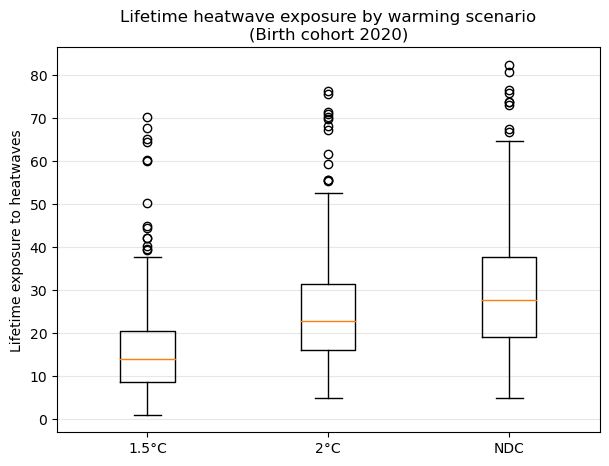

In [29]:
ds_2020 = ds_le.sel(birth_year=2020)

# Extract lifetime exposure for each scenario
data_15 = ds_2020["mmm_15"].values
data_20 = ds_2020["mmm_20"].values
data_ndc = ds_2020["mmm_NDC"].values

df_box = pd.DataFrame({"1.5°C": data_15, "2°C": data_20, "NDC": data_ndc}) # [21] Create a DataFrame for the boxplot
df_box = df_box.dropna() # [22] Remove missing values

plt.figure(figsize=(7, 5))
plt.boxplot(df_box, labels=df_box.columns)
plt.ylabel("Lifetime exposure to heatwaves")
plt.title("Lifetime heatwave exposure by warming scenario\n(Birth cohort 2020)")
plt.grid(axis="y", alpha=0.3)
plt.show()


The boxplot clearly shows an increase in lifetime heatwave exposure from the 1.5 °C to the 2 °C and NDC scenarios for the 2020 birth cohort. Median exposure and the spread across countries both increase with stronger warming, indicating rising climate risk and growing inequality. The greater number of extreme outliers in the NDC scenario indicates that some countries will experience disproportionately high lifetime exposure.